In [1]:
!pip install pandas_datareader
!pip install pmdarima

In [240]:
import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")

In [249]:
train_data = pd.read_csv('train.csv').drop(columns=['브랜드','ID', '대분류','중분류','소분류'])
train_data.head()

,제품,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-00002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-00002-00003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-00003-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
train_data.drop(train_data.index[10:], inplace = True)
train_data.head()

,제품,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-00001-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-00002-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-00002-00002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-00002-00003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-00003-00001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
df = pd.DataFrame((train_data.set_index(['제품'])).stack()).reset_index()
df.head()

,제품,level_1,0
0,B002-00001-00001,2022-01-01,0
1,B002-00001-00001,2022-01-02,0
2,B002-00001-00001,2022-01-03,0
3,B002-00001-00001,2022-01-04,0
4,B002-00001-00001,2022-01-05,0


In [252]:
df2 = df.rename(columns={'level_1' : '날짜',0 : '판매량'})
df2.head()

,제품,날짜,판매량
0,B002-00001-00001,2022-01-01,0
1,B002-00001-00001,2022-01-02,0
2,B002-00001-00001,2022-01-03,0
3,B002-00001-00001,2022-01-04,0
4,B002-00001-00001,2022-01-05,0


In [253]:
df3=df2.drop('제품',axis=1)
df3

,날짜,판매량
0,2022-01-01,0
1,2022-01-02,0
2,2022-01-03,0
3,2022-01-04,0
4,2022-01-05,0
...,...,...
4585,2023-03-31,0
4586,2023-04-01,0
4587,2023-04-02,0
4588,2023-04-03,0


In [254]:
df3['Datetime'] = pd.to_datetime(df3['날짜'])
df3 = df3.set_index('Datetime')
df3 = df3.fillna(0)
df3

,날짜,판매량
Datetime,,
2022-01-01,2022-01-01,0
2022-01-02,2022-01-02,0
2022-01-03,2022-01-03,0
2022-01-04,2022-01-04,0
2022-01-05,2022-01-05,0
...,...,...
2023-03-31,2023-03-31,0
2023-04-01,2023-04-01,0
2023-04-02,2023-04-02,0


In [255]:
df4 = df3.drop(columns=['날짜'])
df4

,판매량
Datetime,
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,0
2022-01-05,0
...,...
2023-03-31,0
2023-04-01,0
2023-04-02,0


In [256]:
#df3 = df3.iloc[0:-2000]

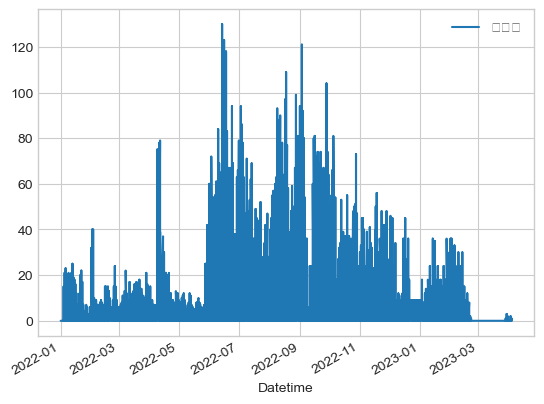

In [226]:
fig = df4.plot()

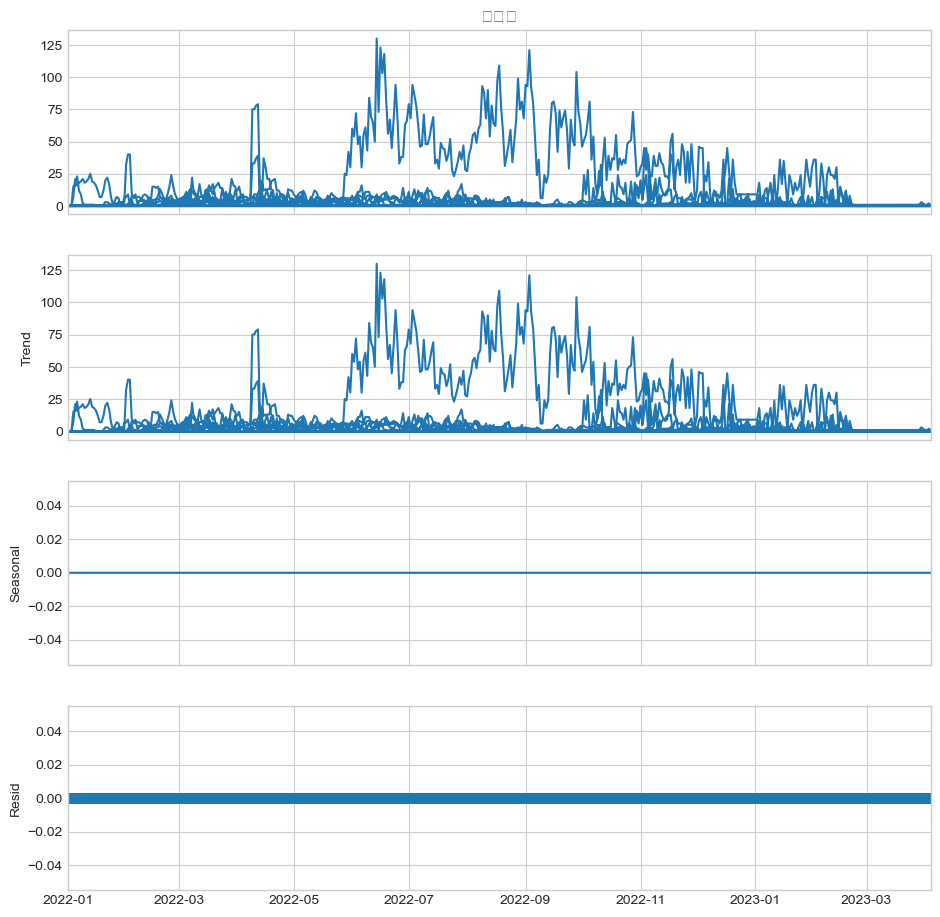

In [227]:
decompostion = sm.tsa.seasonal_decompose(df4['판매량'], model='additive', period=1)
fig = decompostion.plot()
fig.set_size_inches(10,10)
plt.show()

In [228]:
train_data, test_data = train_test_split(df4, test_size=0.2, shuffle=False)

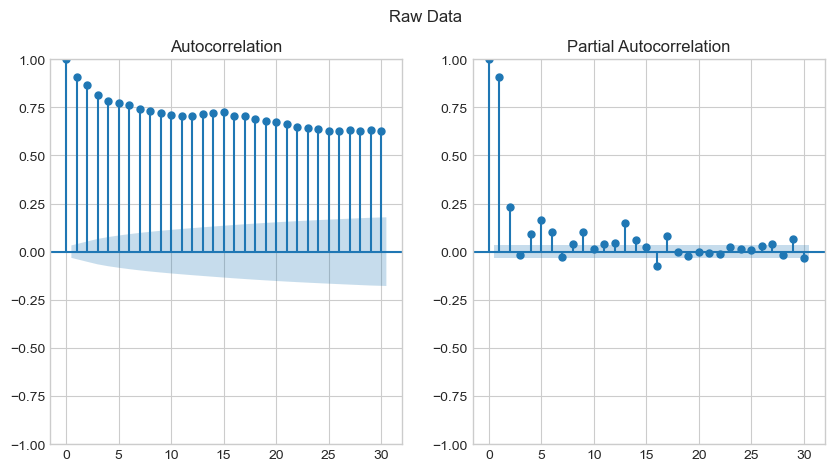

In [229]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);

In [230]:
#Differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['판매량'].diff()
diff_train_data = diff_train_data.dropna()
print('#### Raw Data ####')
print(train_data)
print('### Differenced Data ###')
print(diff_train_data)

#### Raw Data ####
            판매량
Datetime       
2022-01-01    0
2022-01-02    0
2022-01-03    0
2022-01-04    0
2022-01-05    0
...         ...
2023-03-31    0
2023-04-01    0
2023-04-02    0
2023-04-03    0
2023-04-04    0

[3672 rows x 1 columns]
### Differenced Data ###
Datetime
2022-01-02    0.0
2022-01-03    0.0
2022-01-04    0.0
2022-01-05    0.0
2022-01-06    0.0
             ... 
2023-03-31    0.0
2023-04-01    0.0
2023-04-02    0.0
2023-04-03    0.0
2023-04-04    0.0
Name: 판매량, Length: 3671, dtype: float64


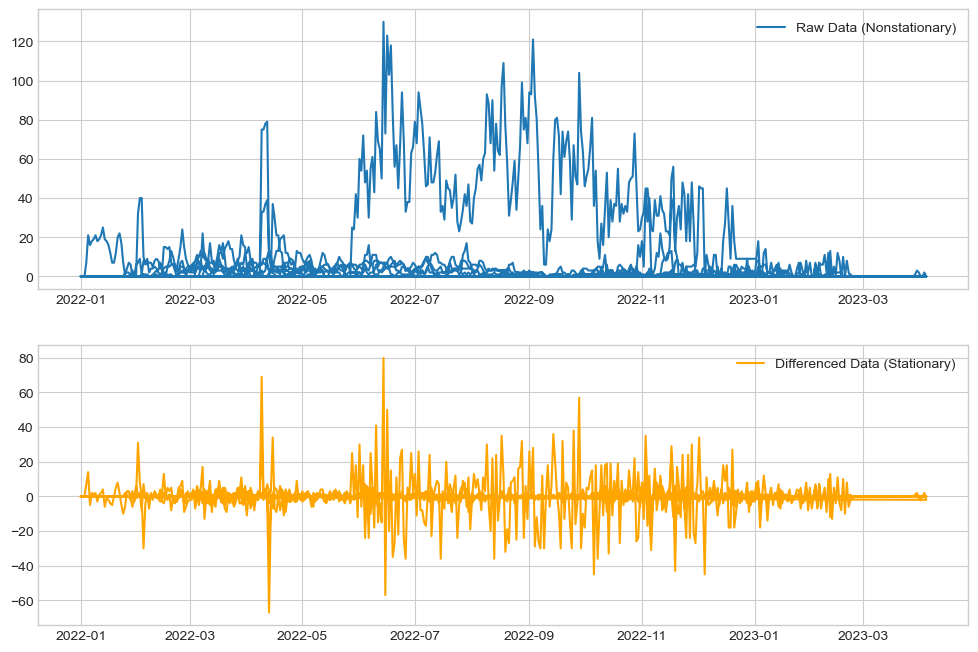

In [231]:
#differenced data plot

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['판매량'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data,'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

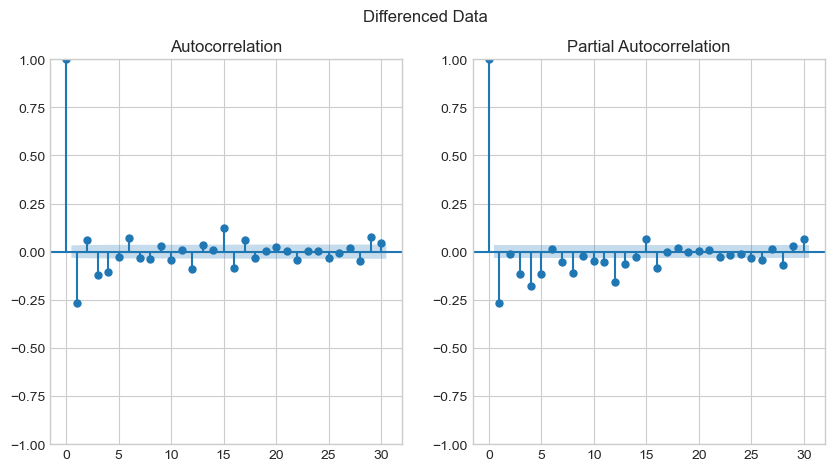

In [232]:
#ACF, PACF plot
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

Estimate Parameters

In [233]:
#ARIMA model fitting
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data.values, order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3672
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -11394.870
Date:                Fri, 18 Aug 2023   AIC                          22793.740
Time:                        21:02:24   BIC                          22806.156
Sample:                             0   HQIC                         22798.161
                               - 3672                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2686      0.005    -58.260      0.000      -0.278      -0.260
sigma2        29.0902      0.139    208.667      0.000      28.817      29.363
Ljung-Box (L1) (Q):                   0.04   Jarque-

In [234]:
print('Examples of parameter combinations for Seasonal ARIMA')
p = range(0,3)
d = range(1,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

aic=[]
for i in pdq:
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i}>>AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))

Examples of parameter combinations for Seasonal ARIMA
ARIMA: (0, 1, 0)>>AIC : 23066.79
ARIMA: (0, 1, 1)>>AIC : 22781.06
ARIMA: (0, 1, 2)>>AIC : 22772.19
ARIMA: (1, 1, 0)>>AIC : 22793.74
ARIMA: (1, 1, 1)>>AIC : 22614.12
ARIMA: (1, 1, 2)>>AIC : 22579.7
ARIMA: (2, 1, 0)>>AIC : 22795.17
ARIMA: (2, 1, 1)>>AIC : 22564.22
ARIMA: (2, 1, 2)>>AIC : 22539.85


In [235]:
optimal = [(pdq[i],j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 2), 22539.85)]

In [236]:
model_opt = ARIMA(train_data.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3672
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11264.924
Date:                Fri, 18 Aug 2023   AIC                          22539.847
Time:                        21:02:36   BIC                          22570.888
Sample:                             0   HQIC                         22550.899
                               - 3672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1540      0.027      5.712      0.000       0.101       0.207
ar.L2          0.4053      0.016     25.262      0.000       0.374       0.437
ma.L1         -0.5076      0.028    -18.127      0.000      -0.563      -0.453
ma.L2         -0.3892      0.025    -15.347      0.000      -0.439      -0.339
sigma2        27.0913      0.131    207.496      0.000      26.835      27.347
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):            377196.99
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):              19.26   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [237]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction
predicted_ub = prediction + prediction[1]
predicted_lb = prediction - prediction[1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

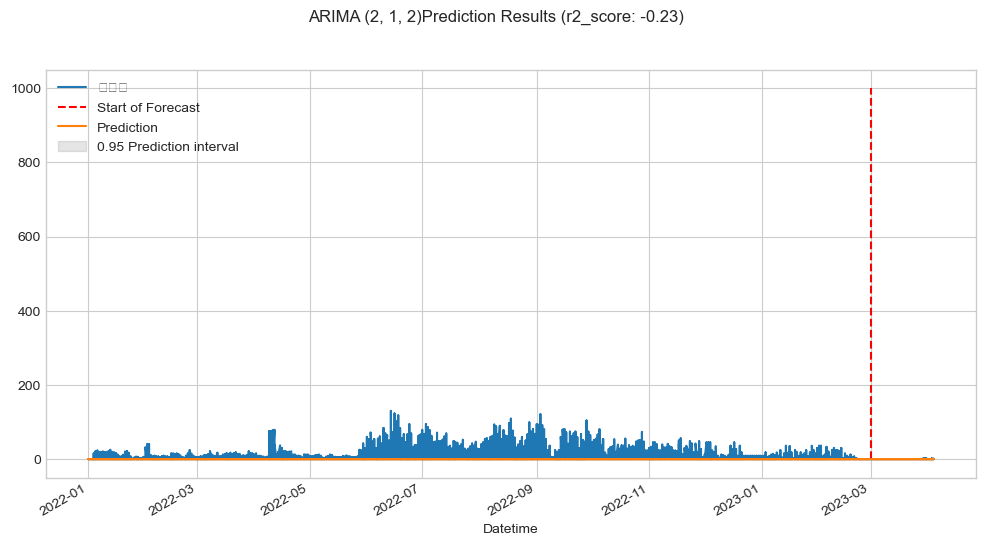

In [238]:
start_date = pd.to_datetime('2023-03-01')
fig, ax=plt.subplots(figsize=(12,6))
df4.plot(ax=ax);
ax.vlines(start_date,0,1000, linestyle='--', color='r', label='Start of Forecast');
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label='0.95 Prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]}Prediction Results (r2_score: {round(r2,2)})')
plt.show()

,판매량
Datetime,
2022-01-01,0
2022-01-02,0
2022-01-03,0
2022-01-04,0
2022-01-05,0


auto_arima

In [209]:
auto_arima_model = auto_arima(train_data, start_p =1, start_1=1,
                             max_p=3, max_q=3, m=3, seasonal=True,
                             max_P=3, max_Q=3,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=23068.786, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[3] intercept   : AIC=23022.116, Time=0.95 sec
 ARIMA(0,1,0)(0,0,2)[3] intercept   : AIC=23002.114, Time=1.69 sec
 ARIMA(0,1,0)(0,0,3)[3] intercept   : AIC=23003.879, Time=2.93 sec
 ARIMA(0,1,0)(1,0,0)[3] intercept   : AIC=23015.819, Time=0.62 sec
 ARIMA(0,1,0)(1,0,1)[3] intercept   : AIC=23012.526, Time=2.27 sec
 ARIMA(0,1,0)(1,0,2)[3] intercept   : AIC=23004.033, Time=5.77 sec
 ARIMA(0,1,0)(1,0,3)[3] intercept   : AIC=23005.126, Time=6.17 sec
 ARIMA(0,1,0)(2,0,0)[3] intercept   : AIC=23006.803, Time=1.02 sec
 ARIMA(0,1,0)(2,0,1)[3] intercept   : AIC=23006.873, Time=4.31 sec
 ARIMA(0,1,0)(2,0,2)[3] intercept   : AIC=22954.422, Time=10.71 sec
 ARIMA(0,1,0)(2,0,3)[3] intercept   : AIC=22957.886, Time=16.00 sec
 ARIMA(0,1,0)(3,0,0)[3] intercept   : AIC=23002.216, Time=2.16 sec
 ARIMA(0,1,0)(3,0,1)[3] intercept   : AIC=23009.424, Time=3.29 sec
 ARIMA(0,1,0)(3,0,2)[3] intercept   : AIC=22960.684, Time=16

In [210]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 3672
Model:             SARIMAX(2, 1, 1)x(0, 0, [1, 2], 3)   Log Likelihood              -11253.880
Date:                                Fri, 18 Aug 2023   AIC                          22521.760
Time:                                        21:00:42   BIC                          22565.218
Sample:                                             0   HQIC                         22537.232
                                               - 3672                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.546e-06      0.006     -0.000      1.000      -0.011       0.011
ar.L1          0.5936      0.006     92.774      0.000       0.581       0.606
ar.L2          0.1517      0.005     28.615      0.000       0.141       0.162
ma.L1         -0.9443      0.003   -300.778      0.000      -0.950      -0.938
ma.S.L3       -0.0785      0.006    -12.936      0.000      -0.090      -0.067
ma.S.L6        0.0935      0.006     16.654      0.000       0.083       0.105
sigma2        26.9276      0.133    202.764      0.000      26.667      27.188
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):            369358.17
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              18.69   Skew:                             2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

use to forecase -auto_arima

In [213]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

SARIMA

In [201]:
print('Examples of parameter combinations for Seasonal ARIMA..')
p = range(0, 3)
d = range(1, 2)
q = range(0, 3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p,d,q))]

aic=[]
params=[]
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX(train_data.values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA: {i}{j} >>AIC : {round(model_fit.aic,2)}')
            aic.append(round(model_fit.aic,2))
            params.append((i,j))
        except:
                continue

Examples of parameter combinations for Seasonal ARIMA..
SARIMA: (0, 1, 0)(0, 1, 0, 3) >>AIC : 26015.5
SARIMA: (0, 1, 0)(0, 1, 1, 3) >>AIC : 23073.9
SARIMA: (0, 1, 0)(0, 1, 2, 3) >>AIC : 23027.61
SARIMA: (0, 1, 0)(1, 1, 0, 3) >>AIC : 24482.05
SARIMA: (0, 1, 0)(1, 1, 1, 3) >>AIC : 23021.32
SARIMA: (0, 1, 0)(1, 1, 2, 3) >>AIC : 23018.0
SARIMA: (0, 1, 0)(2, 1, 0, 3) >>AIC : 23967.41
SARIMA: (0, 1, 0)(2, 1, 1, 3) >>AIC : 23012.19
SARIMA: (0, 1, 0)(2, 1, 2, 3) >>AIC : 23019.97
SARIMA: (0, 1, 1)(0, 1, 0, 3) >>AIC : 25847.48
SARIMA: (0, 1, 1)(0, 1, 1, 3) >>AIC : 22788.56
SARIMA: (0, 1, 1)(0, 1, 2, 3) >>AIC : 22700.11
SARIMA: (0, 1, 1)(1, 1, 0, 3) >>AIC : 24285.24
SARIMA: (0, 1, 1)(1, 1, 1, 3) >>AIC : 22695.29
SARIMA: (0, 1, 1)(1, 1, 2, 3) >>AIC : 22696.54
SARIMA: (0, 1, 1)(2, 1, 0, 3) >>AIC : 23762.2
SARIMA: (0, 1, 1)(2, 1, 1, 3) >>AIC : 22696.38
SARIMA: (0, 1, 1)(2, 1, 2, 3) >>AIC : 22692.06
SARIMA: (0, 1, 2)(0, 1, 0, 3) >>AIC : 25082.02
SARIMA: (0, 1, 2)(0, 1, 1, 3) >>AIC : 22779.83
SARIMA: 

In [202]:
optimal = {(params[i],j)for i, j in enumerate(aic) if j==min(aic)}
optimal

{(((2, 1, 2), (2, 1, 1, 3)), 22523.42)}